<a href="https://colab.research.google.com/github/maruwrks/Deep-Learning-Task/blob/main/end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tarfile
import urllib
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

## Data Loading


In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

## Data Exploration


In [ ]:
print("Top 5 rows:")
print(housing.head())

print("\nData Info:")
housing.info()

print("\nValue counts for 'ocean_proximity':")
print(housing["ocean_proximity"].value_counts())

print("\nSummary of numerical attributes:")
print(housing.describe())

Top 5 rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2

Histograms of numerical attributes:


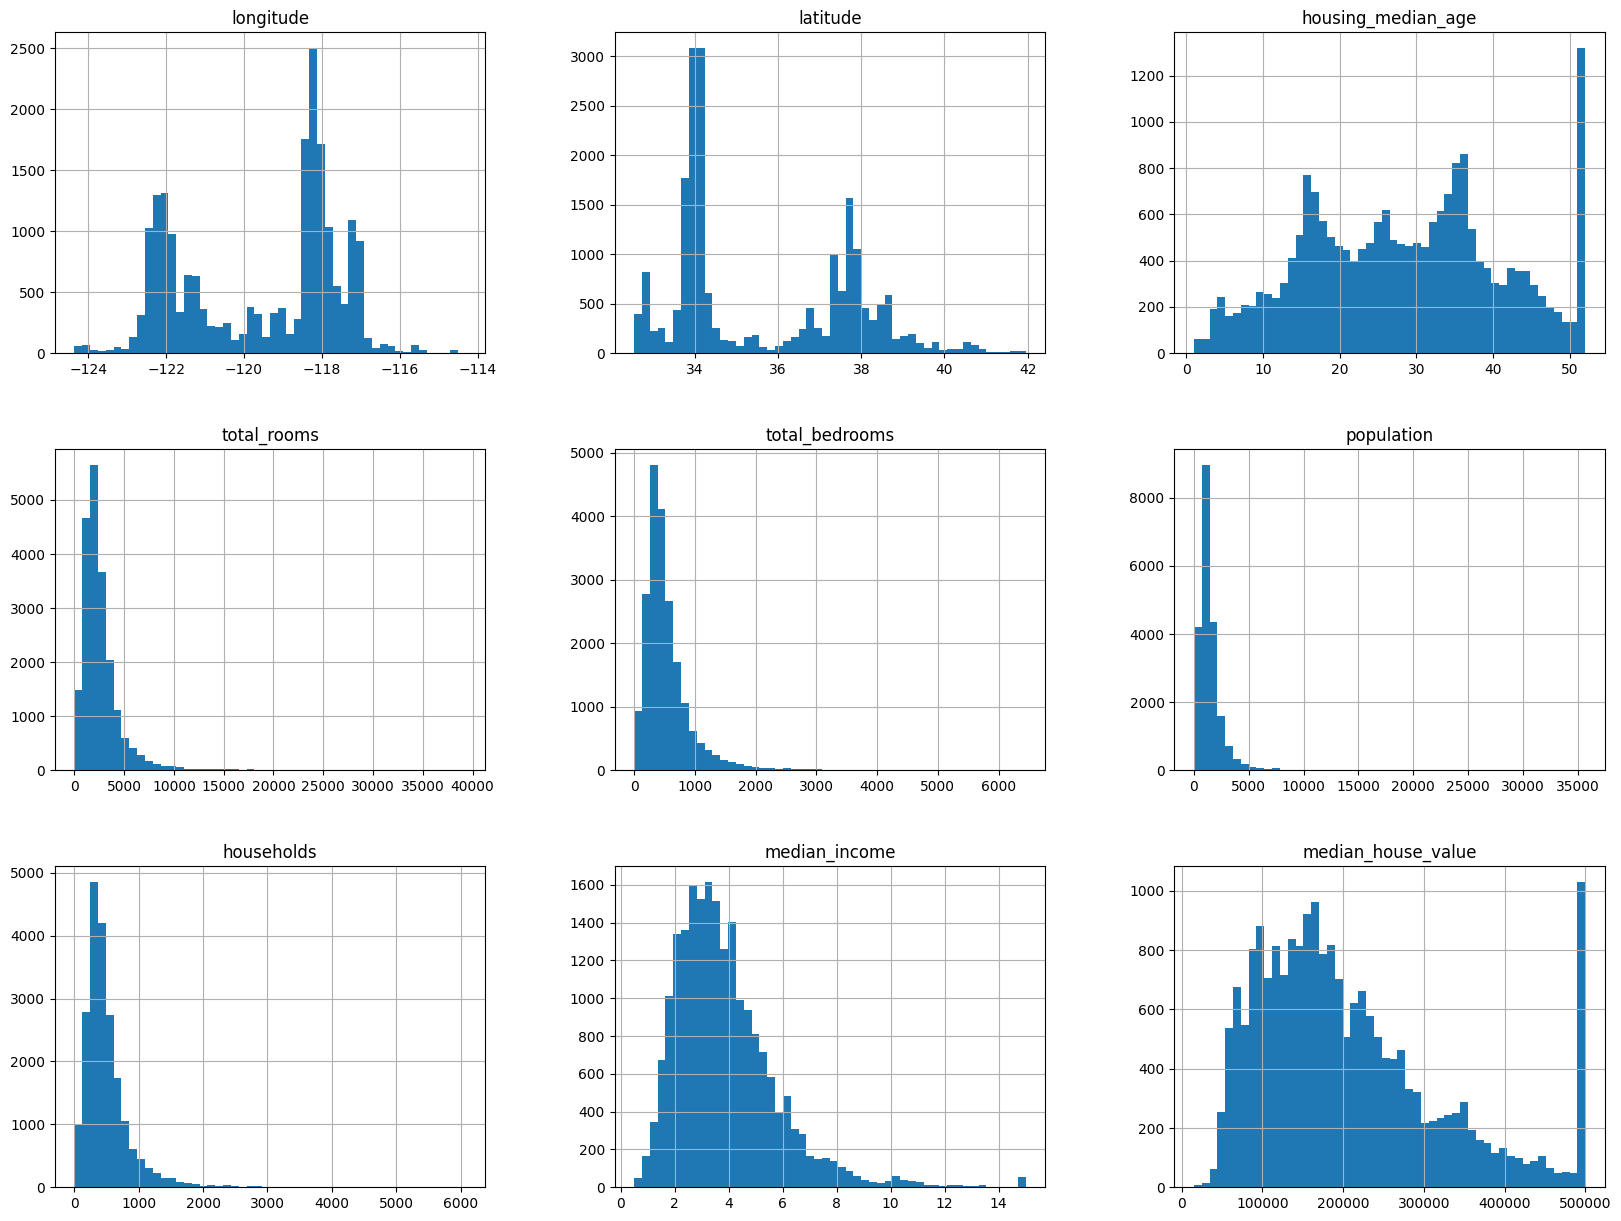


Geographical scatter plot:


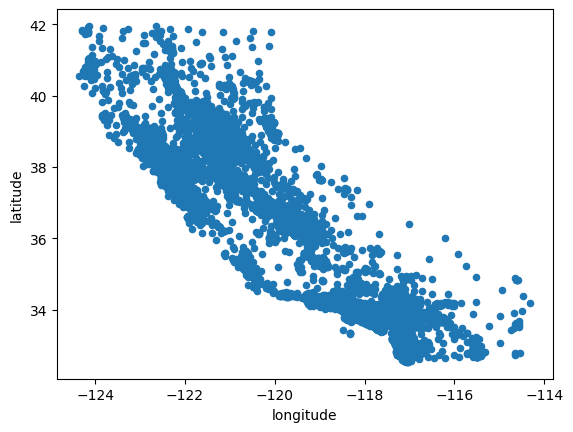


Geographical scatter plot with high density highlighted:


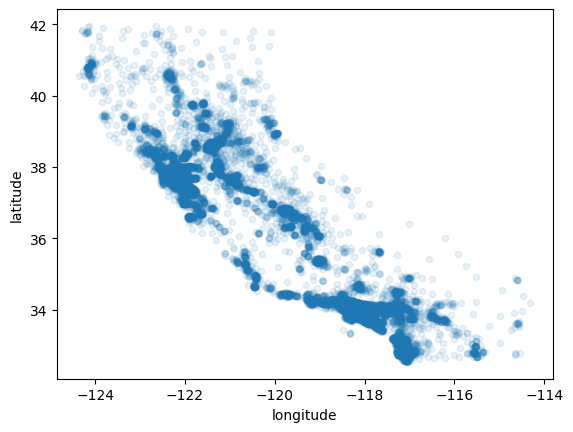


California housing prices (population and house value):


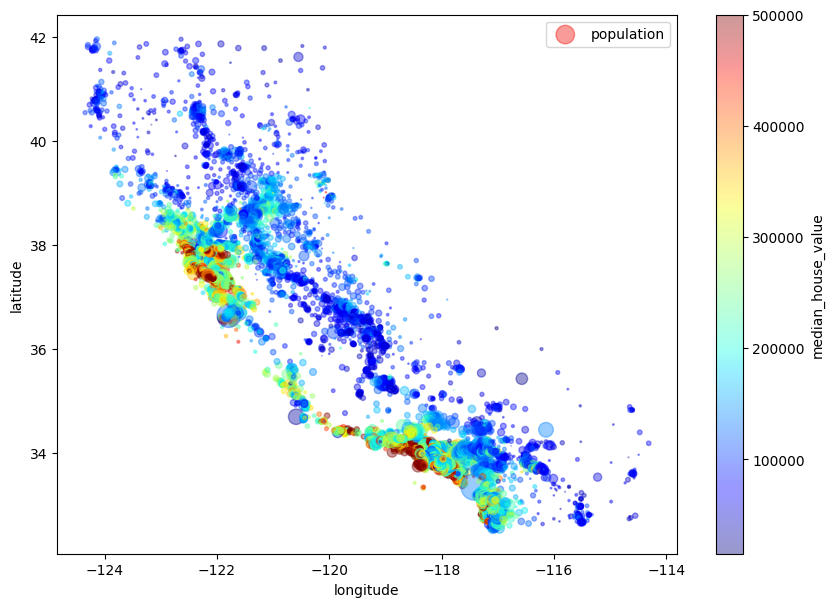

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

print("Histograms of numerical attributes:")
housing.hist(bins=50, figsize=(20,15))
plt.show()

print("\nGeographical scatter plot:")
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

print("\nGeographical scatter plot with high density highlighted:")
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

print("\nCalifornia housing prices (population and house value):")
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

Correlation with 'median_house_value':
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


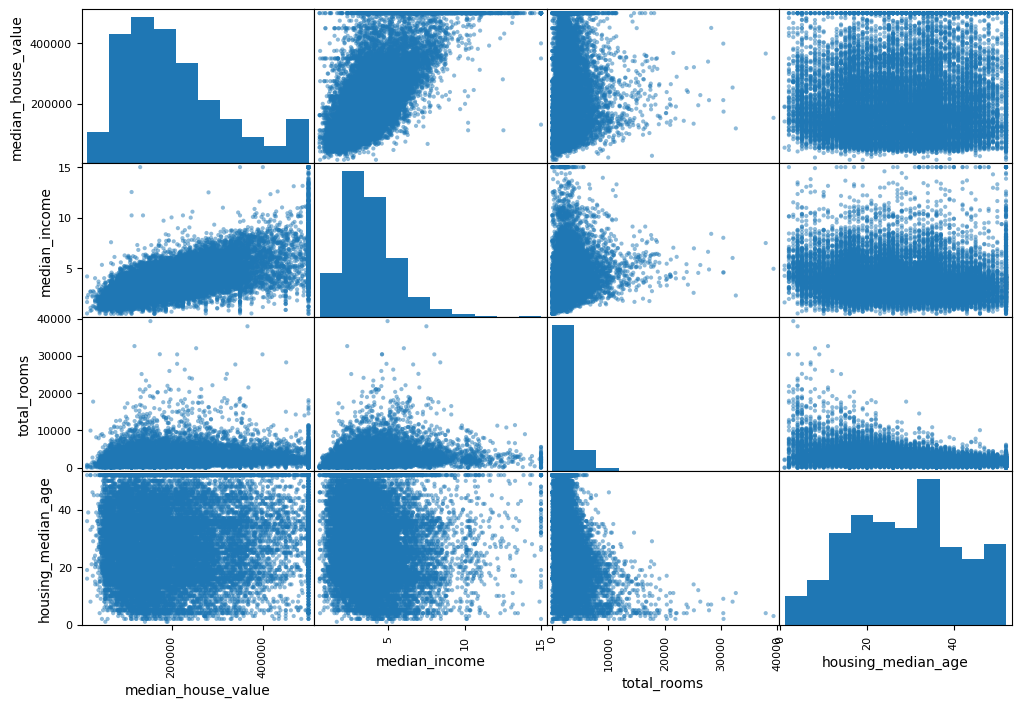


Median income vs median house value scatter plot:


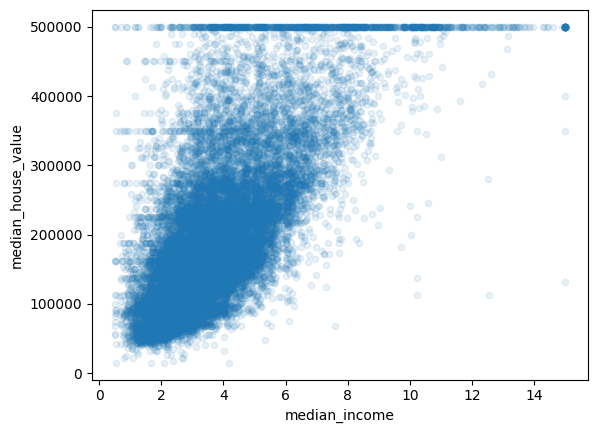

In [ ]:
from pandas.plotting import scatter_matrix
corr_matrix = housing.corr(numeric_only=True)

print("Correlation with 'median_house_value':")
print(corr_matrix["median_house_value"].sort_values(ascending=False))

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

print("\nMedian income vs median house value scatter plot:")
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.show()

##Correlation


In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr(numeric_only=True)
print("Updated correlation with 'median_house_value' after adding new attributes:")
print(corr_matrix["median_house_value"].sort_values(ascending=False))

Updated correlation with 'median_house_value' after adding new attributes:
median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64



Length of train_set (simple split): 16512
Length of test_set (simple split): 4128

Length of train_set (ID split): 16512
Length of test_set (ID split): 4128

Length of train_set (Lat/Lon ID split): 16322
Length of test_set (Lat/Lon ID split): 4318

Length of train_set (Scikit-Learn split): 16512
Length of test_set (Scikit-Learn split): 4128

Histogram of income categories:


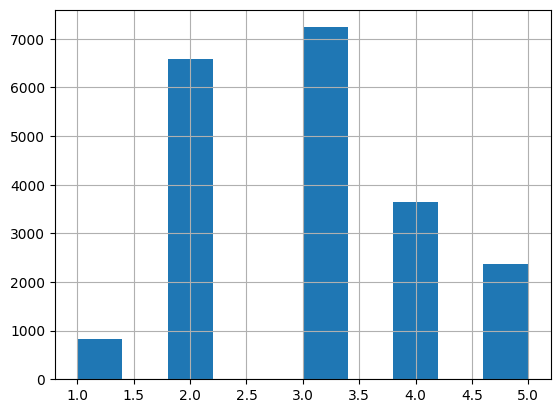


Income category proportions in stratified test set:
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

Income category proportions in full dataset:
income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from zlib import crc32
from sklearn.model_selection import train_test_split

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print("\nLength of train_set (simple split):", len(train_set))
print("Length of test_set (simple split):", len(test_set))

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index() # menambahkan kolom `index`
train_set_id, test_set_id = split_train_test_by_id(housing_with_id, 0.2, "index")
print("\nLength of train_set (ID split):", len(train_set_id))
print("Length of test_set (ID split):", len(test_set_id))

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set_lat_lon, test_set_lat_lon = split_train_test_by_id(housing_with_id, 0.2, "id")
print("\nLength of train_set (Lat/Lon ID split):", len(train_set_lat_lon))
print("Length of test_set (Lat/Lon ID split):", len(test_set_lat_lon))

train_set_sk, test_set_sk = train_test_split(housing, test_size=0.2, random_state=42)
print("\nLength of train_set (Scikit-Learn split):", len(train_set_sk))
print("Length of test_set (Scikit-Learn split):", len(test_set_sk))

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

print("\nHistogram of income categories:")
housing["income_cat"].hist()
plt.show()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

print("\nIncome category proportions in stratified test set:")
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))
print("\nIncome category proportions in full dataset:")
print(housing["income_cat"].value_counts() / len(housing))

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

##Split data


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

print("\nImputer statistics (medians of numerical attributes):")
print(imputer.statistics_)
print("Medians computed directly from housing_num:")
print(housing_num.median().values)

X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
print("\nHousing data after numerical imputation (first 5 rows):")
print(housing_tr.head())


housing_cat = housing[["ocean_proximity"]]
print("\nOriginal categorical data (first 10 rows):")
print(housing_cat.head(10))

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print("\nEncoded categorical data (first 10 rows):")
print(housing_cat_encoded[:10])
print("\nCategories found by OrdinalEncoder:")
print(ordinal_encoder.categories_)

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print("\nOne-hot encoded categorical data (sparse matrix info):")
print(housing_cat_1hot)
print("\nOne-hot encoded categorical data (dense array, first 5 rows):")
print(housing_cat_1hot.toarray()[:5])
print("\nCategories found by OneHotEncoder:")
print(cat_encoder.categories_)


rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 # Sesuaikan indeks jika kolom diurutkan berbeda

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
print("\nHousing data with extra attributes (first 5 rows, first 12 columns):")
print(housing_extra_attribs[:5, :12])


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)
print("\nHousing data after full preprocessing pipeline (first 5 rows):")
print(housing_prepared[:5])
print("Shape of housing_prepared:", housing_prepared.shape)


Imputer statistics (medians of numerical attributes):
[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11900000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54155000e+00
  5.23234164e+00  2.03027043e-01  2.81766108e+00]
Medians computed directly from housing_num:
[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11900000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54155000e+00
  5.23234164e+00  2.03027043e-01  2.81766108e+00]

Housing data after numerical imputation (first 5 rows):
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       po

## Building and Training Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("\nLinear Regression - Predictions vs. Labels for first 5 instances:")
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("\nLinear Regression RMSE on training set:", lin_rmse)

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42) # Menambahkan random_state untuk reproduktifitas
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("\nDecision Tree RMSE on training set:", tree_rmse) # Akan mendekati 0 karena overfitting

from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print("\nDecision Tree Cross-Validation Scores:")
display_scores(tree_rmse_scores)

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print("\nLinear Regression Cross-Validation Scores:")
display_scores(lin_rmse_scores)

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42) # Menambahkan random_state untuk reproduktifitas
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("\nRandomForestRegressor RMSE on training set:", forest_rmse)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print("\nRandomForestRegressor Cross-Validation Scores:")
display_scores(forest_rmse_scores)



Linear Regression - Predictions vs. Labels for first 5 instances:
Predictions: [ 83836.78432038 305631.11438241 150098.65527848 187972.73800539
 241953.08535364]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]

Linear Regression RMSE on training set: 68147.64600570854

Decision Tree RMSE on training set: 0.0

Decision Tree Cross-Validation Scores:
Scores: [72507.06929076 70938.34389572 68969.61701121 72008.3147559
 69576.77700412 76911.00011308 70706.14671618 74136.58143839
 67591.18850635 72407.05029764]
Mean: 71575.20890293615
Standard deviation: 2541.5610453927866

Linear Regression Cross-Validation Scores:
Scores: [71175.20367855 63821.26974903 67697.80546255 68278.06070129
 66715.42204686 72268.49850759 69890.50682343 68450.2338678
 65939.95316432 70071.80569063]
Mean: 68430.87596920488
Standard deviation: 2409.126845799903

RandomForestRegressor RMSE on training set: 18660.768029715546

RandomForestRegressor Cross-Validation Scores:
Scores: [51443.18973844 48613.6295659

## Settings Model


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

# Menampilkan hyperparameter terbaik
print("\nBest hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Menampilkan estimator terbaik
print("\nBest estimator found by GridSearchCV:")
print(grid_search.best_estimator_)

# Menampilkan skor evaluasi dari grid search
cvres = grid_search.cv_results_
print("\nGridSearchCV results (RMSE and parameters):")
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


Best hyperparameters found by GridSearchCV:
{'max_features': 8, 'n_estimators': 30}

Best estimator found by GridSearchCV:
RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

GridSearchCV results (RMSE and parameters):
65398.02611664638 {'max_features': 2, 'n_estimators': 3}
56444.908411019176 {'max_features': 2, 'n_estimators': 10}
54039.64386051053 {'max_features': 2, 'n_estimators': 30}
62001.40913707432 {'max_features': 4, 'n_estimators': 3}
54246.66797502356 {'max_features': 4, 'n_estimators': 10}
52178.306633058026 {'max_features': 4, 'n_estimators': 30}
60955.876462925524 {'max_features': 6, 'n_estimators': 3}
53609.18401647923 {'max_features': 6, 'n_estimators': 10}
51264.32869173396 {'max_features': 6, 'n_estimators': 30}
59711.63642844107 {'max_features': 8, 'n_estimators': 3}
52816.65324006809 {'max_features': 8, 'n_estimators': 10}
50981.64786281073 {'max_features': 8, 'n_estimators': 30}
65328.81211789274 {'bootstrap': False, 'max_features': 2, 'n_est

# Evaluate


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

num_attribs = list(housing_num.columns)
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs

print("\nFeature importances from the best RandomForestRegressor:")
print(sorted(zip(feature_importances, attributes), reverse=True))


Feature importances from the best RandomForestRegressor:
[(np.float64(0.31148437004352025), 'median_income'), (np.float64(0.16833752670034005), 'INLAND'), (np.float64(0.06666732580531842), 'longitude'), (np.float64(0.06361941634894938), 'population_per_household'), (np.float64(0.06269590035326525), 'pop_per_hhold'), (np.float64(0.0562922501201551), 'latitude'), (np.float64(0.04924417874449654), 'bedrooms_per_room'), (np.float64(0.041037374502137555), 'bedrooms_per_room'), (np.float64(0.03966787553575641), 'rooms_per_hhold'), (np.float64(0.039313224566835676), 'rooms_per_household'), (np.float64(0.03840927076699274), 'housing_median_age'), (np.float64(0.013087240596250044), 'population'), (np.float64(0.013077909308793453), 'total_rooms'), (np.float64(0.012839792830793563), 'households'), (np.float64(0.012480768746407604), 'total_bedrooms'), (np.float64(0.006572770777419109), '<1H OCEAN'), (np.float64(0.0030607691339408546), 'NEAR OCEAN'), (np.float64(0.0020719692106183733), 'NEAR BAY')

In [ ]:
from scipy import stats

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("\nFinal RMSE on the test set:", final_rmse)

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
confidence_interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                                               loc=squared_errors.mean(),
                                               scale=stats.sem(squared_errors)))
print("\n95% confidence interval for generalization error (RMSE):", confidence_interval)


Final RMSE on the test set: 48689.22278115499

95% confidence interval for generalization error (RMSE): [46644.45792103 50651.50911197]
